In [114]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [115]:
iris = datasets.load_iris()

In [116]:
for key in iris.keys():
    print( key )

data
target
target_names
DESCR
feature_names
filename


In [117]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])
df = pd.concat([X,y], axis=1)

In [118]:
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [119]:
X = df[df.species!=0].drop('species', axis=1)
y = df[df.species!=0].species
X = X[X.columns[2:3]].values
y = y.values

In [120]:
model = LogisticRegression()
model.fit( X, y )

C:\Users\Name\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y,model.predict(X))

0.88

метод градиентного спуска

In [122]:
EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - y) * X) / len(predictions)    

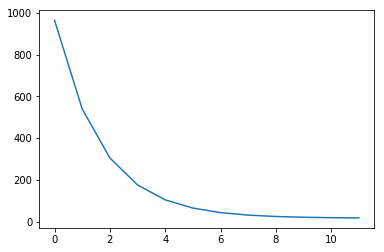

In [123]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.show()

In [125]:
params

array([-0.15875806,  0.3045316 ])